In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

import scipy.stats as ss
from scipy.stats import multivariate_normal

from google.colab import files
import time

In [ ]:

media1= [-4, -4]
media2=[5, 5]
SIGMA1=  [[1, 0.5], [0.5, 1]]
SIGMA2= [[1, -0.3], [-0.3, 1]]

SIGMA1_INV=np.linalg.inv(SIGMA1)
SIGMA2_INV=np.linalg.inv(SIGMA2)

def mezcla_bivariada(q):
 return(multivariate_normal(media1, SIGMA1).pdf(q) * 0.4  +  0.6 * multivariate_normal(media2, SIGMA2).pdf(q) )
def U(q):
 return(-np.log(mezcla_bivariada(q)))
def grad_norm_vib(q,media, desv,inversa): 
 return(-multivariate_normal(media, desv).pdf(q)*np.transpose(inversa.dot(np.transpose(q-media))))
def grad_U(q): 
 return((0.4* grad_norm_vib(q,media1, SIGMA1, SIGMA1_INV) + 0.6*grad_norm_vib(q,media2, SIGMA2,SIGMA2_INV))/-mezcla_bivariada(q))

NameError: ignored

In [ ]:
def HMCMC(U, grad_U, epsilon, L, inicial_q, N):
  #En el primer paso nuevos valores son  escogidos para el momentum, p, aleatoriamente de una distribución normal, y son independientes de la posición q. 
  mu, sigma = 0, 1 # Parametros de la normal
  
  q = inicial_q #El punto de inicio del algoritmo
  cadena=q
  rechazos=0
  for i in range(1,N): 
    p = np.array([np.random.normal(mu, sigma, q.shape[1])])  #Asignamos el nuevo valor de p, independiente de q
    actual_p = p  
    for i in range(1,L+1):
      q= q+epsilon*p
  #paso completo para el momento excepto en la ultima
      if(i!=L):
        p=p-epsilon*grad_U(q)

    p= p - epsilon * grad_U(q) / 2   ##termina el algoritmo de Leap Frog 
  # Hacemos la propuesta simétrica cambiando el signo 
    p = -p
    actual_U = U(inicial_q)
    actual_K = np.sum(actual_p**2) / 2
    propuesta_U = U(q)
    propuesta_K = np.sum(p**2) / 2

    if random.uniform(0, 1) < np.exp(actual_U-propuesta_U+actual_K-propuesta_K):
      cadena=np.r_[cadena,q]
      inicial_q=q

    else:
      cadena=np.r_[cadena,inicial_q]
      rechazos=rechazos+1
  return(cadena, rechazos)


#Punto inicial (-9,-9)

In [ ]:
q=np.array([[-9,-9]])
np.random.seed(0)
random.seed(0)
t0_HMC = time.time()
muestra_h=HMCMC(U,grad_U,0.2,30,q, 5000) 
t1_HMC = time.time()
print("--- %s segundos ---" % (t1_HMC- t0_HMC))

In [ ]:
tasa_rechazo= muestra_h[1]/(muestra_h[0].shape[0]-1)
tasa_aceptacion = 1- tasa_rechazo
tasa_aceptacion

0.9387877575515103

In [ ]:
muestra_th=muestra_h[0]

In [ ]:
q1=muestra_th[:,0]
q2=muestra_th[:,1]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

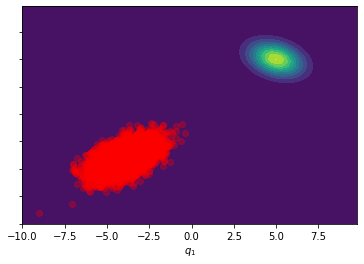

In [ ]:
x, y = np.mgrid[-10:10:.3, -10:10:.3]
pos = np.dstack((x, y))

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, mezcla_bivariada(pos), 10)
plt.plot(q1, q2, 'o', c='red', alpha=0.3)
plt.xlabel(r'$q_{1}$')
plt.gca().axes.yaxis.set_ticklabels([])
plt.savefig("mezclah1.png",bbox_inches='tight',dpi=300)
files.download("mezclah1.png")
#plt.plot(q1, q2, "r")

#Punto inicial (2.5,2.5)

In [ ]:
q_inicial2=np.array([[2.5,2.5]])
np.random.seed(0)
random.seed(0)
t2_HMC = time.time()
muestra_h2=HMCMC(U,grad_U,0.2,30,q_inicial2, 5000) 
t3_HMC = time.time()
print("--- %s segundos ---" % (t3_HMC- t2_HMC))

--- 120.66342854499817 segundos ---


In [ ]:

tasa_rechazo2= muestra_h2[1]/(muestra_h2[0].shape[0]-1)
tasa_aceptacion2 = 1- tasa_rechazo2
tasa_aceptacion2

0.9149829965993199

In [ ]:
muestra_th2=muestra_h2[0]

In [ ]:
q1_2=muestra_th2[:,0]
q2_2=muestra_th2[:,1]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

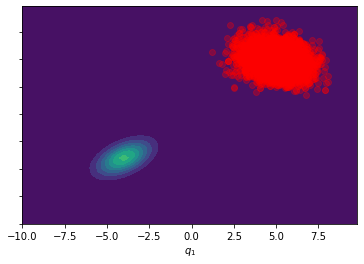

In [ ]:
x, y = np.mgrid[-10:10:.3, -10:10:.3]
pos = np.dstack((x, y))

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, mezcla_bivariada(pos), 10)
plt.plot(q1_2, q2_2, 'o', c='red', alpha=0.3)

#plt.ylabel(r'$q_{2}$')
plt.xlabel(r'$q_{1}$')
plt.gca().axes.yaxis.set_ticklabels([])

#plt.savefig("mezclah2.png",bbox_inches='tight',dpi=300)
#files.download("mezclah2.png")

#RWMH

In [ ]:

def RWMH(p_ini, densidad, mu, sigma, N):
  contador=0     #vector de muestras
  muestra=p_ini        #primera posición nuestro punto inicial
  for i in range(1, N):           
    propuesta=p_ini+np.random.normal(mu, sigma, p_ini.shape[1])    #el valor propuesto 
    razon = min(densidad(propuesta)/densidad(p_ini),1)
    if random.uniform(0, 1) < razon:
      actual=propuesta
      p_ini=propuesta
      
    else:
      actual=p_ini
      contador=contador+1
    muestra=np.r_[muestra,actual]
  return(muestra, contador)


In [ ]:
media1= [-4, -4]
media2=[5, 5]

SIGMA1=  [[1, 0.5], [0.5, 1]]
SIGMA2= [[1, -0.3], [-0.3, 1]]

def mezcla_bivariada(q):
 return(multivariate_normal(media1, SIGMA1).pdf(q) * 0.4  +  0.6 * multivariate_normal(media2, SIGMA2).pdf(q))

#Punto inicial (-9,-9)

In [ ]:
q=np.array([[-9,-9]])
np.random.seed(0)
random.seed(0)
t0_RWMH = time.time()
muestra=RWMH(q,mezcla_bivariada,0,0.2, 5000*30)
t1_RWMH = time.time()
print("--- %s segundos ---" % (t1_RWMH- t0_RWMH))

--- 171.41742825508118 segundos ---


In [ ]:

tasa_rechazo= muestra[1]/(muestra[0].shape[0]-1)
tasa_aceptacion = 1- tasa_rechazo
tasa_aceptacion

0.8890659271061807

In [ ]:
muestra_t=muestra[0]

In [ ]:
q1=muestra_t[:,0][np.arange(0,len(muestra_t[:,0]),35)]
q2=muestra_t[:,1][np.arange(0,len(muestra_t[:,0]),35)]

Text(0.5, 0, '$q_{1}$')

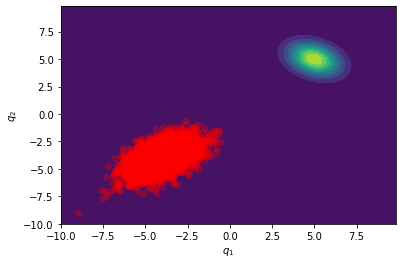

In [ ]:
x, y = np.mgrid[-10:10:.2, -10:10:.2]
pos = np.dstack((x, y))

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, mezcla_bivariada(pos), 10)
plt.plot(q1, q2, 'o', c='red', alpha=0.3)
plt.ylabel(r'$q_{2}$')
plt.xlabel(r'$q_{1}$')

#plt.savefig("mezclarw1.png",bbox_inches='tight',dpi=300)
#files.download("mezclarw1.png")

#plt.plot(q1, q2, "r")

#Punto inicial (2.5,2.5)

In [ ]:
q_se=np.array([[2.5,2.5]])
np.random.seed(0)
random.seed(0)
t2_RWMH = time.time()
muestra_se=RWMH(q_se,mezcla_bivariada,0,0.2, 5000*30)
t3_RWMH = time.time()
print("--- %s segundos ---" % (t3_RWMH- t2_RWMH))

--- 170.54541063308716 segundos ---


In [ ]:
tasa_rechazo2= muestra_se[1]/(muestra_se[0].shape[0]-1)
tasa_aceptacion2 = 1- tasa_rechazo2
tasa_aceptacion2

0.8995526636844245

In [ ]:
muestra_set=muestra_se[0]

In [ ]:
q1_se=muestra_set[:,0][np.arange(0,len(muestra_set[:,0]),35)]
q2_se=muestra_set[:,1][np.arange(0,len(muestra_set[:,0]),35)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

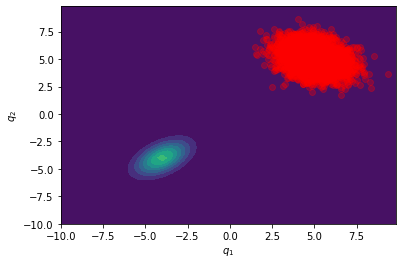

In [ ]:
x, y = np.mgrid[-10:10:.3, -10:10:.3]
pos = np.dstack((x, y))

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, mezcla_bivariada(pos), 10)
plt.plot(q1_se, q2_se, 'o', c='red', alpha=0.3)
plt.ylabel(r'$q_{2}$')
plt.xlabel(r'$q_{1}$')

#plt.savefig("mezclarw2.png",bbox_inches='tight',dpi=300)
#files.download("mezclarw2.png")

Text(0.5, 0, '$q_{1}$')

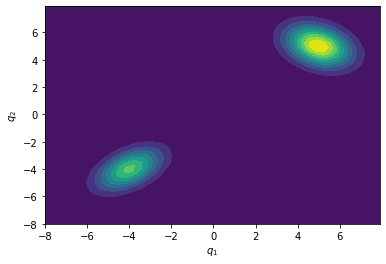

In [ ]:
x, y = np.mgrid[-8:8:.3, -8:8:.3]
pos = np.dstack((x, y))

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, mezcla_bivariada(pos), 10)
plt.ylabel(r'$q_{2}$')
plt.xlabel(r'$q_{1}$')

#plt.savefig("mezcla.png",bbox_inches='tight',dpi=300)
#files.download("mezcla.png")
